<a href="https://colab.research.google.com/github/projectwint/practice_AI/blob/main/ImageDataGenerator_%ED%95%99%EC%8A%B5%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://velog.io/@ym980118/%EB%94%A5%EB%9F%AC%EB%8B%9D-Keras-ImageDataGenerator%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95-Data-Augmentation

--2023-01-30 14:14:29--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 23.185.0.2, 2620:12a:8000::2
Connecting to www.sciencenews.org (www.sciencenews.org)|23.185.0.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61745 (60K) [image/jpeg]
Saving to: ‘033120_HT_covid-cat_feat-1028x579.jpg’

033120_HT_covid-cat 100%[===================>]  60.30K  --.-KB/s    in 0.01s   

2023-01-30 14:14:29 (5.28 MB/s) - ‘033120_HT_covid-cat_feat-1028x579.jpg’ saved [61745/61745]



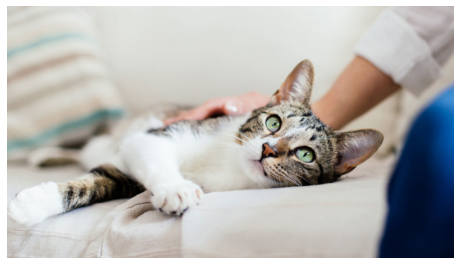

In [ ]:
import numpy as np
import pandas as pd
import os

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#이미지 다운로드
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat_feat-1028x579.jpg


# opencv에서는 BGR 순이므로 BGR에서 RGB로 convertColor 해줌
image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'),cv2.COLOR_BGR2RGB)

def show_image(image):
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  plt.axis('off')

show_image(image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


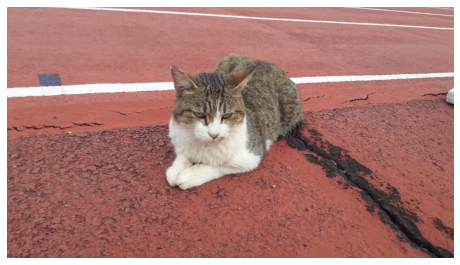

In [ ]:
import numpy as np
import pandas as pd
import os

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# opencv에서는 BGR 순이므로 BGR에서 RGB로 convertColor 해줌
#image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'),cv2.COLOR_BGR2RGB)

def show_image(image):
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  plt.axis('off')

img_dir = "/content/drive/MyDrive/img_test" #폴더만 따로 저장(여러 파일 열기 위해)
img = Image.open(img_dir + "/cat.jpg")

show_image(img)

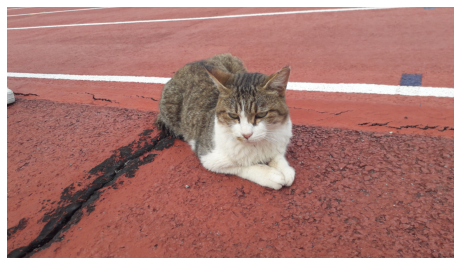

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 좌우 반전 , 좌우반전을 True로 했지만 keras에서 랜덤으로 할 지 말 지 결정!..즉 좌우 반전 안 될 수도 있음.
data_generator = ImageDataGenerator(horizontal_flip = True)

image_batch = np.expand_dims(img,axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')
show_image(aug_image)

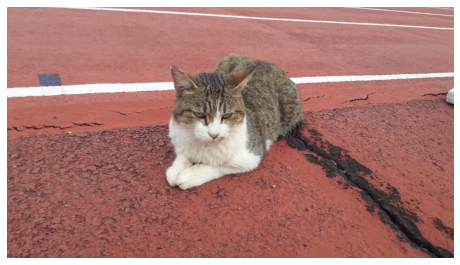

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 상하반전을 True로 했지만 keras에서 랜덤으로 할 지 말 지 결정!..즉 상하 반전 안 될 수도 있음.
data_generator = ImageDataGenerator(vertical_flip = True) #상하반전

image_batch = np.expand_dims(img,axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')
show_image(aug_image)

상하반전은 부자연스럽다고 판단한 건지 제대로 되지 않는다.

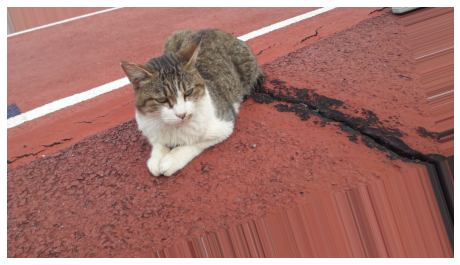

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=45.0)

image_batch = np.expand_dims(img,axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')
show_image(aug_image)

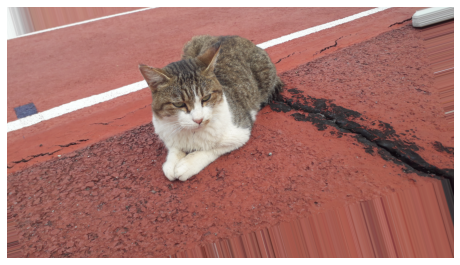

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=45.0,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    shear_range = 0.5)

image_batch = np.expand_dims(img,axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')
show_image(aug_image)

실제로 쓸 물 사진 중에 하나로 해보기

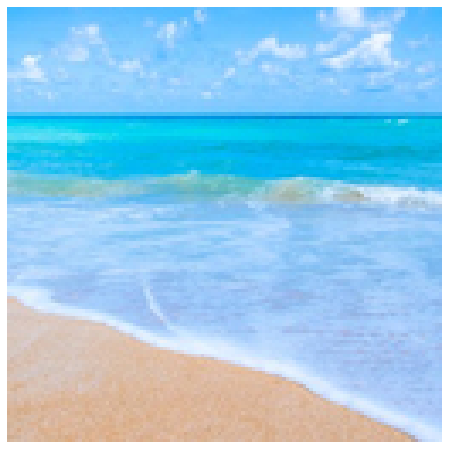

In [ ]:
import numpy as np
import pandas as pd
import os

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

# opencv에서는 BGR 순이므로 BGR에서 RGB로 convertColor 해줌
#image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpg'),cv2.COLOR_BGR2RGB)

def show_image(image):
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  plt.axis('off')

img_dir = "/content/drive/MyDrive/2차_편집/물체_1_사진/pixabay/" #폴더만 따로 저장(여러 파일 열기 위해)
img = Image.open(img_dir + "/amazing-2451327__340.jpg")

show_image(img)

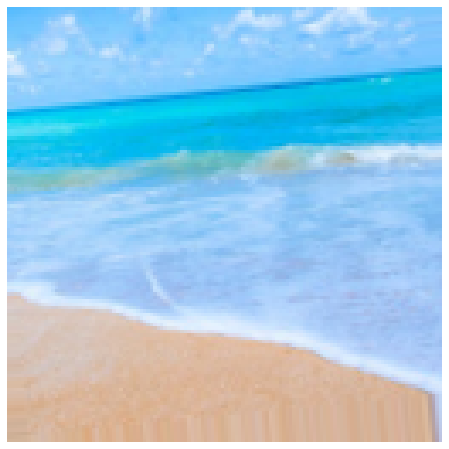

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=15.0,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    shear_range = 0.5)

image_batch = np.expand_dims(img,axis=0) #4차원으로 늘려주기


# ImageDataGenerator 적용하려면 fit과 flow를 해야함.
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

#실행을 위해선 next 필요
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)

aug_image = aug_image.astype('int')
show_image(aug_image)